## Business Questions:
1) What is the total ECE commission revenue from all contracts?

2) How is revenue distributed by year and month?

3) Which agents have generated the highest revenue from contracts?

4) What is the most common contract type, and how does the revenue vary across different contract types?

5) What is the event participation trend over the years?

In [1]:
!pip install pyodbc sqlalchemy azure-identity

In [2]:
import pyodbc
print(pyodbc.drivers())


['ODBC Driver 18 for SQL Server']


In [5]:
import pyodbc
from sqlalchemy import create_engine

# Azure SQL Database details
server = 'techentjan.database.windows.net'
database = 'QAECECRM_jan'
username = 'azureml_anushka1'
password = 'AnuJan@Azure123'

# Connection string
connection_string = f"DRIVER={{ODBC Driver 18 for SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};Encrypt=yes"


# Connect to Azure SQL Database
try:
    conn = pyodbc.connect(connection_string)
    print("Connection successful!")
except Exception as e:
    print(f"Error: {e}")

Connection successful!


In [6]:
import pyodbc
print(pyodbc.drivers())

['ODBC Driver 18 for SQL Server']


In [7]:
!pip install pandas pyodbc matplotlib seaborn scikit-learn

In [8]:
import pandas as pd

In [9]:
contract = "SELECT * FROM Contract"
df_contract = pd.read_sql(contract, conn)

contract_transaction = "SELECT * FROM ContractTransaction"
df_contract_transaction = pd.read_sql(contract_transaction, conn)

contract_signature = "SELECT * FROM ContractSignature"
df_contract_signature = pd.read_sql(contract_signature, conn)

contract_eventdate = "SELECT * FROM ContractEventDate"
df_contract_eventdate = pd.read_sql(contract_eventdate, conn)

contract_artist = "SELECT * FROM ContractArtist"
df_contract_artist = pd.read_sql(contract_artist, conn)

contract_artist_eventdate = "SELECT * FROM ContractArtistEventDate"
df_contract_artist_eventdate = pd.read_sql(contract_artist_eventdate, conn)

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import pyodbc

# Business Case 1 

## What is the Total ECE Commission Revenue?

The ECE Commission Revenue represents the total earnings from commissions charged on contracts. Understanding commission revenue helps in:

1) Evaluating profitability from contract deals.

2) Tracking financial performance over time.

3) Optimizing commission structures for better revenue generation.

The total ECE commission revenue tells us how much money was earned via commissions.
High commission revenue suggests strong contract performance.
If commission revenue is low, the company may need to re-evaluate commission structures.

In [11]:
# SQL query for total cleaned ECE commission revenue
query_1 = "SELECT SUM(COALESCE(ECECommission, 0)) AS total_ece_revenue FROM (SELECT DISTINCT ContractId, ECECommission FROM ContractArtist) cleaned_data;"

# Executing the query and saving in DataFrame
df_ece_revenue = pd.read_sql(query_1, conn)

# Display result in a readable format
total_ece_revenue = df_ece_revenue["total_ece_revenue"].iloc[0]  # Extracting the revenue value
formatted_revenue = f"${total_ece_revenue:,.2f}" 

print(f"Total ECE Commission Revenue: {formatted_revenue}")


Total ECE Commission Revenue: $165,529,537.08


In [26]:
formatted_revenue

'$165,529,537.08'

## Business Question 2: What is the Revenue Breakdown by Year and Month?

Businesses need to track revenue trends over time. Understanding seasonal patterns helps in:

1) Forecasting revenue and budgeting.

2) Identifying peak business periods.

3) Understanding the impact of economic events on revenue

This analysis reveals revenue trends over time.
Businesses can identify seasonal trends, such as revenue peaks in Q4 or slow months.
If revenue is declining, strategies like pricing changes or promotional campaigns can be explored.

In [12]:
revenue_breakdown_query = "SELECT YEAR(CreatedDate) AS RevenueYear, MONTH(CreatedDate) AS RevenueMonth, SUM(ECECommission) AS TotalRevenue FROM ContractArtist WHERE CreatedDate IS NOT NULL GROUP BY YEAR(CreatedDate), MONTH(CreatedDate) ORDER BY RevenueYear, RevenueMonth;"

# Executing the SQL query
df_revenue_breakdown = pd.read_sql(revenue_breakdown_query, conn)

In [13]:
df_revenue_breakdown.head()

,RevenueYear,RevenueMonth,TotalRevenue
0,2018,6,1.153608e+08
1,2018,7,6.876733e+05
2,2018,8,8.259740e+05
3,2018,9,6.202994e+05
4,2018,10,7.885591e+05


/tmp/ipykernel_5254/2952398519.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


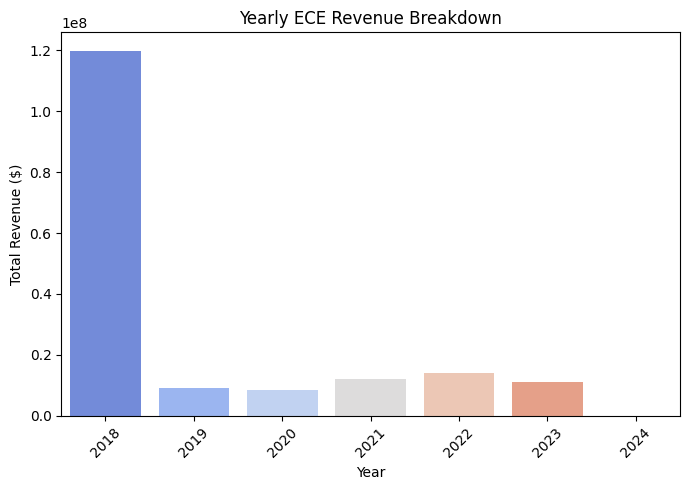

In [14]:
import seaborn as sns
# Aggregating the yearly revenue
df_yearly_revenue = df_revenue_breakdown.groupby('RevenueYear').agg({'TotalRevenue': 'sum'}).reset_index()

# visualization
plt.figure(figsize=(7, 5))
sns.barplot(
    data=df_yearly_revenue,
    x='RevenueYear',
    y='TotalRevenue',
    palette='coolwarm'
)
plt.title("Yearly ECE Revenue Breakdown")
plt.xlabel("Year")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Business Question 3: Who are the Top Revenue-Generating Agents and how does their performance compare?

Identifying top-performing agents is crucial for:

1) Incentive planning (rewarding top agents) - Agents play a critical role in negotiating contracts and ensuring successful transactions.

2) Sales strategy optimization (understanding which agents close the best contracts) - Understanding which agents generate the most revenue can help the business focus on high-performing agents or identify areas for improvement in underperforming ones.

3) Resource allocation (assigning high-value clients to top agents) - Insights from this query can inform commission strategies, identify top performers for recognition, and help plan resource allocation to maximize revenue.

Top-performing agents can be identified based on revenue contribution.
Helps in agent performance evaluation and incentive planning.
If some agents consistently outperform others, their sales strategies can be replicated across the team.


In [15]:
# SQL query to calculate revenue generated by each agent
agent_revenue_query = "SELECT c.AgentId, SUM(c.Gross) AS ContractRevenue, SUM(ct.RequiredAmount) AS TransactionRevenue, (SUM(c.Gross) + SUM(ct.RequiredAmount)) AS TotalRevenue FROM Contract c LEFT JOIN ContractTransaction ct ON c.ContractId = ct.ContractId GROUP BY c.AgentId ORDER BY TotalRevenue DESC;"

# Executing the query
df_agent_revenue = pd.read_sql(agent_revenue_query, conn)
#df_agent_revenue.head()


/tmp/ipykernel_5254/3839054828.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


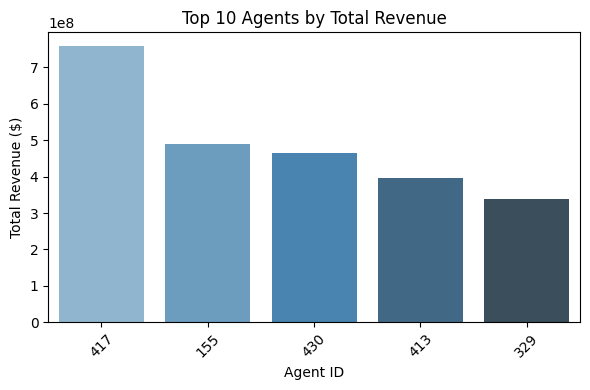

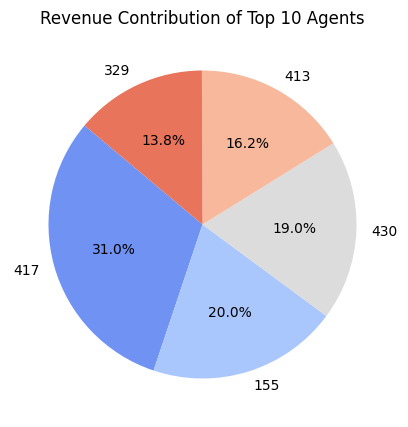

In [16]:
# Top 10 agents by revenue
top_agents = df_agent_revenue.head()

# Bar Chart
plt.figure(figsize=(6, 4))
sns.barplot(
    x=top_agents['AgentId'].astype(str),
    y=top_agents['TotalRevenue'],
    palette='Blues_d'
)
plt.title("Top 10 Agents by Total Revenue")
plt.xlabel("Agent ID")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pie Chart
plt.figure(figsize=(5, 5))
plt.pie(
    top_agents['TotalRevenue'],
    labels=top_agents['AgentId'].astype(str),
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('coolwarm', len(top_agents))
)
plt.title("Revenue Contribution of Top 10 Agents")
plt.show()


# Business Case 4 : What is the event participation trend over the years?

It helps understand how event participation has evolved over time and identifies growth patterns or declines, which can help guide marketing strategies and improve event management.

Table used - ContractEventDate

Relevant column used - EventDate
(because it contains information about the dates of events, which can be aggregated to find trends over time)

This analysis will show event participation trends over the years, highlighting growth or decline and provide actionable insights for planning future events and targeting specific periods for promotions.

In [17]:
event_trend_query = "SELECT YEAR(EventDate) AS EventYear, COUNT(*) AS TotalEvents FROM ContractEventDate GROUP BY YEAR(EventDate) ORDER BY EventYear;"

# Executing the query
df_event_trend = pd.read_sql(event_trend_query, conn)
df_event_trend.head(20)

,EventYear,TotalEvents
0,201,1
1,1931,1
2,1988,3
3,1989,121
4,1990,1189
5,1991,16028
6,1992,18296
7,1993,17602
8,1994,18465
9,1995,18630


In [18]:
# Filter out the year "201" from the dataset
df_event_trend_filtered = df_event_trend[(df_event_trend['EventYear'] != 201) & (df_event_trend['EventYear'] != 1931) & (df_event_trend['EventYear'] != 2026) & (df_event_trend['EventYear'] != 2028)]
df_event_trend_filtered.head()

,EventYear,TotalEvents
2,1988,3
3,1989,121
4,1990,1189
5,1991,16028
6,1992,18296


In [19]:
df_event_trend_filtered.tail()

,EventYear,TotalEvents
35,2021,8712
36,2022,10012
37,2023,8082
38,2024,2062
39,2025,17


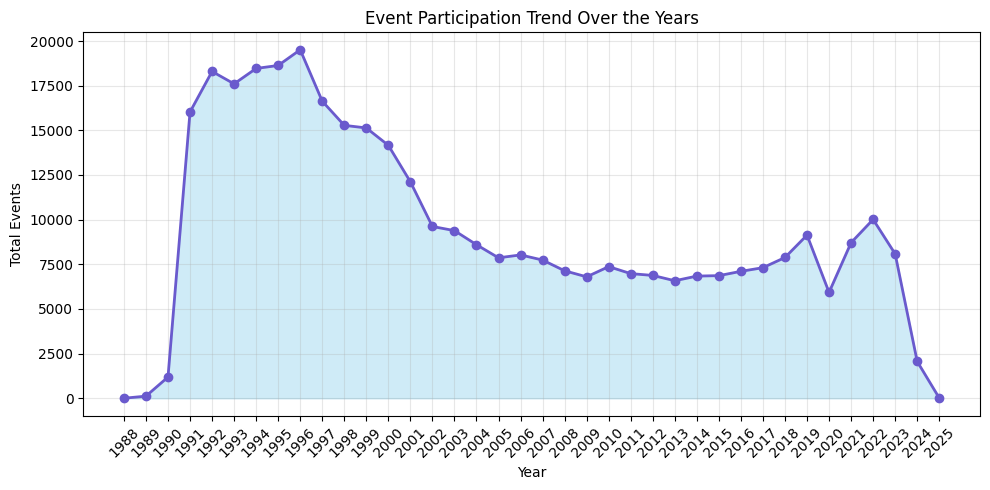

In [20]:
# Area Chart for Event Participation Trend
plt.figure(figsize=(10, 5))
plt.fill_between(
    df_event_trend_filtered['EventYear'],
    df_event_trend_filtered['TotalEvents'],
    color='skyblue',
    alpha=0.4
)
plt.plot(
    df_event_trend_filtered['EventYear'],
    df_event_trend_filtered['TotalEvents'],
    color='SlateBlue',
    linewidth=2,
    marker='o'
)
plt.xticks(
    ticks=df_event_trend_filtered['EventYear'],
    labels=df_event_trend_filtered['EventYear'],
    rotation=45
)
plt.title("Event Participation Trend Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Events")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Business Case 5: What is the most common contract type, and how does the revenue vary across different contract types?

This is helpful in understanding contract type distribution and associated revenue can help identify which contract types are more profitable. It also enables better targeting and optimization of resources towards the most revenue-generating contract types.

Table used - Contract

Relevant column used - ContractTypeId, Gross

These columns provide information about the type of each contract and its associated revenue.

This analysis will help in identifying the most common and profitable contract types and highlight the under-performing contract types for potential improvement or reconsideration.

In [21]:
contract_type_query = "SELECT ContractTypeId, COUNT(*) AS TotalContracts, SUM(Gross) AS TotalRevenue FROM Contract GROUP BY ContractTypeId ORDER BY TotalRevenue DESC;"

# Executing the query
df_contract_type = pd.read_sql(contract_type_query, conn)

In [22]:
df_contract_type.head()

,ContractTypeId,TotalContracts,TotalRevenue
0,1.0,298167,1.092508e+09
1,2.0,3723,2.781554e+07
2,NaN,1743,6.468325e+06


/tmp/ipykernel_5254/1865788464.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


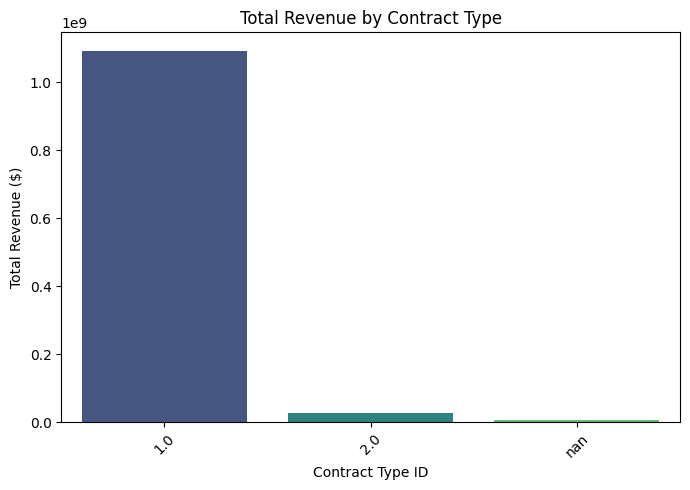

In [23]:
# Bar Chart for Total Revenue by Contract Type
plt.figure(figsize=(7, 5))
sns.barplot(
    x=df_contract_type['ContractTypeId'].astype(str),
    y=df_contract_type['TotalRevenue'],
    palette='viridis'
)
plt.title("Total Revenue by Contract Type")
plt.xlabel("Contract Type ID")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


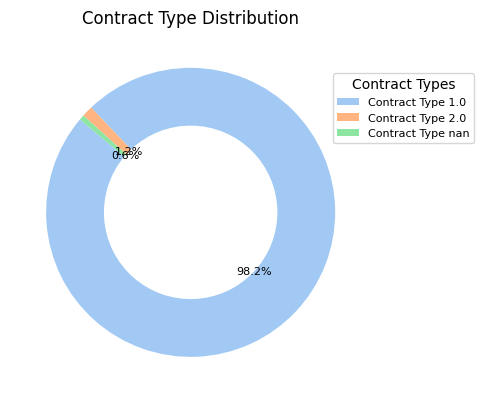

In [24]:
# Donut Chart for Contract Type Distribution
plt.figure(figsize=(5, 5))

# Creating the pie chart
wedges, texts, autotexts = plt.pie(
    df_contract_type['TotalContracts'],
    autopct=lambda p: f'{p:.1f}%',  # Format percentages for all slices
    startangle=140,
    colors=sns.color_palette('pastel', len(df_contract_type)),
    textprops={'fontsize': 8},  # Percentage text size
    wedgeprops={'width': 0.4}  # Adjust the width to create a donut effect
)

# Adding a legend to the side
plt.legend(
    loc="upper right",
    labels=[f"Contract Type {ct}" for ct in df_contract_type['ContractTypeId'].astype(str)],
    title="Contract Types",
    fontsize=8,
    title_fontsize=10,
    bbox_to_anchor=(1.3, 0.9)  # Position legend outside the chart
)

plt.title("Contract Type Distribution", fontsize=12)
plt.tight_layout()  # Ensure everything fits
plt.show()


In [27]:
df_revenue_breakdown
# Business Question 2: What is the Revenue Breakdown by Year and Month?

,RevenueYear,RevenueMonth,TotalRevenue
0,2018,6,1.153608e+08
1,2018,7,6.876733e+05
2,2018,8,8.259740e+05
3,2018,9,6.202994e+05
4,2018,10,7.885591e+05
...,...,...,...
65,2023,11,1.712300e+04
66,2023,12,NaN
67,2024,2,1.375000e+04
68,2024,5,9.550000e+03


In [30]:
df_agent_revenue.head()
# Business Question 3: Who are the Top Revenue-Generating Agents and how does their performance compare?

,AgentId,ContractRevenue,TransactionRevenue,TotalRevenue
0,417,6.587417e+08,99880058.62,7.586218e+08
1,155,4.302688e+08,60203183.28,4.904720e+08
2,430,4.006724e+08,63914447.26,4.645869e+08
3,413,3.571036e+08,40359998.72,3.974636e+08
4,329,2.999889e+08,38708190.80,3.386971e+08


In [31]:
df_event_trend_filtered.head()
# Business Case 4 : What is the event participation trend over the years?

,EventYear,TotalEvents
2,1988,3
3,1989,121
4,1990,1189
5,1991,16028
6,1992,18296


In [34]:
df_revenue_breakdown.to_csv('/mnt/batch/tasks/shared/LS_root/mounts/clusters/anushka/code/Users/dhekneanushka/df_revenue_breakdown.csv', index=False)
df_agent_revenue.to_csv('/mnt/batch/tasks/shared/LS_root/mounts/clusters/anushka/code/Users/dhekneanushka/df_agent_revenue.csv', index=False)
df_event_trend_filtered.to_csv('/mnt/batch/tasks/shared/LS_root/mounts/clusters/anushka/code/Users/dhekneanushka/df_event_trend_filtered.csv', index=False)

In [33]:
import os
print(os.getcwd())

/mnt/batch/tasks/shared/LS_root/mounts/clusters/anushka/code/Users/dhekneanushka
